# library

In [1]:
import tabint
import sklearn

In [47]:
import pdb

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

In [3]:
from sklearn.linear_model import LogisticRegression

In [54]:
import seaborn as sns

# create data

In [4]:
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [124]:
def plot_data(X, y):
    X0 = X[np.where(y == 0)]
    y0 = y[np.where(y == 0)]
    X1 = X[np.where(y == 1)]
    y1 = y[np.where(y == 1)]

    plt.plot(X0, y0, 'ro', markersize = 8)
    plt.plot(X1, y1, 'bs', markersize = 8)

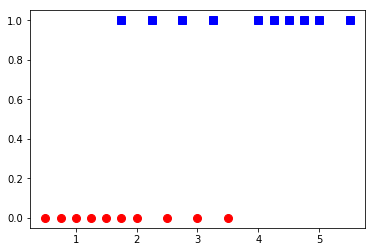

In [125]:
plot_data(X, y)

Vấn đề về dữ liệu này: Không  linearly separable

Có những cách nào có thể sử dụng để phân chia dữ liệu này?

## linear function

In [225]:
def plot_funct(funct, start = 0, stop = 5, space = 100, **kargs):
    line = np.linspace(start, stop, 100)
    res = funct(line, **kargs) #[f(i) for i in line]
    plt.plot(line, res)

In [127]:
def f(x): return x/3 - 0.3

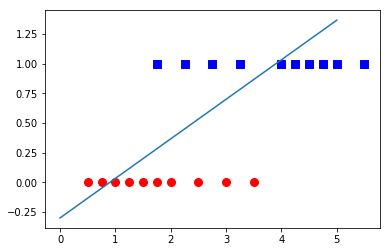

In [129]:
plot_data(X, y)
plot_funct(f)

## hard function

In [138]:
def f(x): return (x > 2).astype(int)

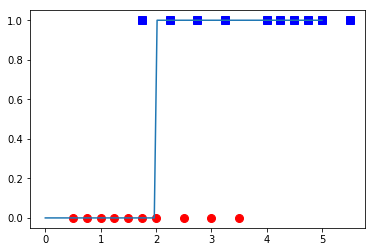

In [139]:
plot_data(X, y)
plot_funct(f)

Do dữ liệu không linear seperate, chúng ta chỉ có thể nói rằng người học nhiều hơn thì có khẳ năng đậu cao hơn chứ không thể phân định cứng được

# sklearn

In [140]:
clf = LogisticRegression(C=1e4)

In [141]:
clf.fit(X.reshape(-1, 1), y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [142]:
X.reshape(-1, 1)[:3]

array([[0.5 ],
       [0.75],
       [1.  ]])

In [143]:
clf.predict_proba(X.reshape(-1, 1)[:3])

array([[0.96525015, 0.03474985],
       [0.95017696, 0.04982304],
       [0.92904621, 0.07095379]])

## coef and intercept

In [95]:
intercept = clf.intercept_[0]; intercept

-4.0762940887470505

In [96]:
coef = clf.coef_[0][0]; coef

1.504164400934044

In [26]:
def sigmoid(x): return 1/(1+np.exp(-x))

In [27]:
sigmoid(X.reshape(-1, 1)[:3]*coef + intercept)

array([[0.25733429],
       [0.28760302],
       [0.3198985 ]])

## plot

In [156]:
def f(x): return clf.predict_proba(x.reshape(-1, 1))[:,1]

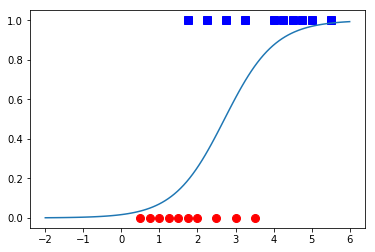

In [158]:
plot_data(X, y)
plot_funct(f, start=-2, stop = 6)

# plot function

In [ ]:
coef_choose = None, intercept_choose = None
if coef_choose is not None: sns.scatterplot([coef_choose], [intercept_choose], markers = "X")

In [240]:
def plot_scatter(coefs, intercepts, loss_results = None, label = True):
    sns.scatterplot(coefs, intercepts, hue = loss_results, legend=False)
    if label:
        plt.xlabel("coef")
        plt.ylabel("intercept")

In [216]:
def plot_predict(f, coef_choose, intercept_choose, x, y, activation_funct, start=-2, stop = 6):
    plot_data(x, y)
    plot_funct(f, start=-2, stop = 6)

# algorithms

In [173]:
def sigmoid(x): return 1/(1+np.exp(-x))

In [174]:
def activation_funct(x): return sigmoid(x)

In [272]:
def cross_entropy_loss(y_true, y_pred):
    return -np.sum([np.log(y_p) if y_t == 1 else np.log(1-y_p) for y_t, y_p in zip(y_true, y_pred)])

In [273]:
def loss_funct(y_true, y_pred): return cross_entropy_loss(y_true, y_pred)

In [176]:
def linear(x, coef, intercept): return x*coef + intercept

In [223]:
def predict(x, coef, intercept, activation_funct = sigmoid): return activation_funct(linear(x, coef, intercept))

In [285]:
def learner(loss_funct = loss_funct, activation_funct = activation_funct,
            start_coef = -2, stop_coef = 5, start_intercept = -5, stop_intercept = 2,
            space = 50, debug = False):
    #initial create
    if debug: pdb.set_trace(); debug_al = False
    coefs = []; intercepts = []; loss_results = []
    global_minima = 1e9; coef_choose = 0; intercept_choose = 0
    
    for coef in np.linspace(start_coef, stop_coef, space):
        for intercept in np.linspace(start_intercept, stop_intercept, space):            
            
            y_pred = predict(X, coef, intercept, activation_funct)            
            loss_result = loss_funct(y, y_pred)
            
            coefs.append(coef)
            intercepts.append(intercept)
            loss_results.append(loss_result)
            
            if loss_result < global_minima:
                coef_choose = coef
                intercept_choose = intercept
                global_minima = loss_result
                
    print('local minima: ', local_minima)
    print('coef: ', coef_choose)
    print('intercept: ', intercept_choose)
    return coefs, coef_choose, intercepts, intercept_choose, loss_results

In [275]:
coefs, coef_choose, intercepts, intercept_choose, loss_results = learner()

local minima:  8.030594311987027
coef:  1.5714285714285712
intercept:  -4.285714285714286


## debug

In [286]:
learner(debug= True)

> <ipython-input-285-a451c2641a04>(6)learner()
-> coefs = []; intercepts = []; loss_results = []
(Pdb) l
  1  	def learner(loss_funct = loss_funct, activation_funct = activation_funct,
  2  	            start_coef = -2, stop_coef = 5, start_intercept = -5, stop_intercept = 2,
  3  	            space = 50, debug = False):
  4  	    #initial create
  5  	    if debug: pdb.set_trace(); debug_al = False
  6  ->	    coefs = []; intercepts = []; loss_results = []
  7  	    global_minima = 1e9; coef_choose = 0; intercept_choose = 0
  8  	
  9  	    for coef in np.linspace(start_coef, stop_coef, space):
 10  	        for intercept in np.linspace(start_intercept, stop_intercept, space):
 11  	
(Pdb) n
> <ipython-input-285-a451c2641a04>(7)learner()
-> global_minima = 1e9; coef_choose = 0; intercept_choose = 0
(Pdb) n
> <ipython-input-285-a451c2641a04>(9)learner()
-> for coef in np.linspace(start_coef, stop_coef, space):
(Pdb) n
> <ipython-input-285-a451c2641a04>(10)learner()
-> for intercept in 

BdbQuit: 

## find global minima

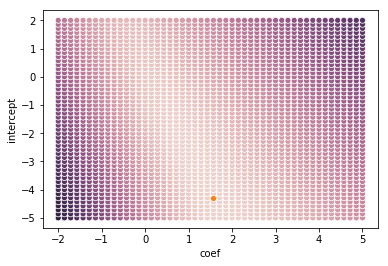

In [241]:
plot_scatter(coefs, intercepts, loss_results)
plot_scatter([coef_choose], [intercept_choose], label=False)

## linear

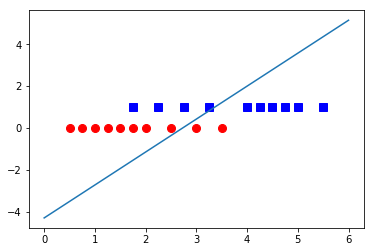

In [232]:
plot_data(X, y)
plot_funct(linear, start=0, stop = 6, coef = coef_choose, intercept = intercept_choose)

## sigmoid

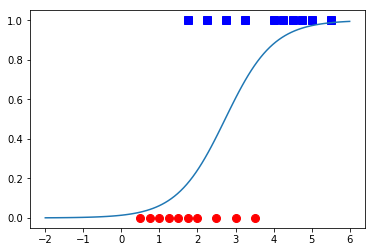

In [234]:
plot_data(X, y)
plot_funct(predict, start=-2, stop = 6, coef = coef_choose, intercept = intercept_choose)

## cross entropy loss

In [248]:
??cross_entropy_loss

bản chất là đánh phạt đối với các trường hợp không chính xác

giá trị loss trong trường hợp nhãn bằng 1, rõ ràng, khi càn gần 1, giá trị loss càng giảm, trong khi dự đoán càng nhỏ, giá trị loss càng cao

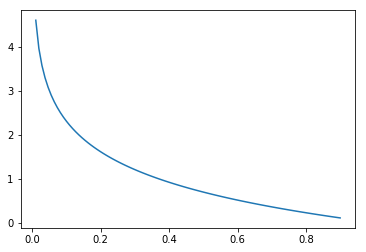

In [277]:
f = lambda x: -np.log(x)
plot_funct(f, start=0.01, stop=0.9, space=100)

tương tự với nhãn 0

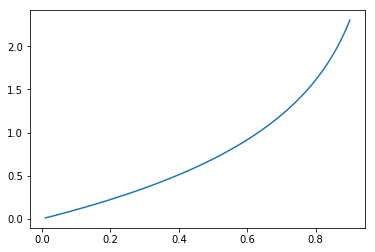

In [283]:
f = lambda x: -np.log(1-x)
plot_funct(f, start=0.01, stop=0.9, space=100)

# two dimensional data

![title](log_reg_2_dim.gif)

![title](logistic_2d_2.png)

# different activation function

## tanh?

sigmoid funtion

![title](sigmoid.png)

In [196]:
??sigmoid

tanh function

![title](tanh.png)

![title](tanh_line.png)

In [197]:
def tanh(x): return (np.exp(x) - np.exp(-x))/(np.exp(x) - np.exp(-x))

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


local minima:  1000000000.0
coef:  0
intercept:  0


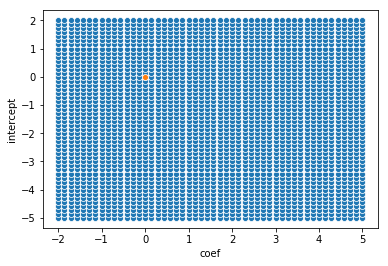

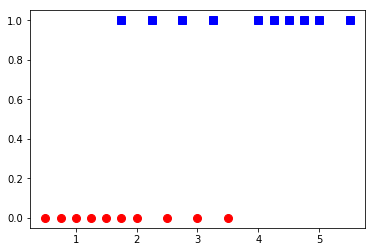

In [198]:
learner(activation_funct = tanh)

# customize loss function

## weighted loss

In [209]:
def weighted_loss(y_true, y_pred):
    return -np.sum([np.log(y_p)*0.8 if y_t == 1 else np.log(1-y_p)*0.2 for y_t, y_p in zip(y_true, y_pred)])

In [280]:
coefs, coef_choose, intercepts, intercept_choose, loss_results = learner(loss_funct = weighted_loss)

local minima:  8.030594311987027
coef:  1.5714285714285712
intercept:  -2.857142857142857


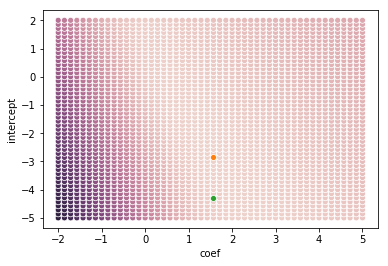

In [281]:
plot_scatter(coefs, intercepts, loss_results)
plot_scatter([coef_choose], [intercept_choose], label=False)
plot_scatter([1.5714285714285712], [-4.285714285714286], label=False)

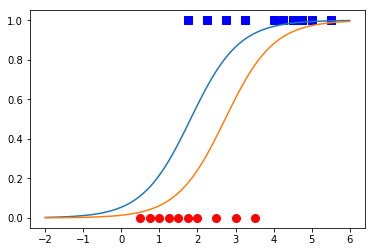

In [282]:
plot_data(X, y)
plot_funct(predict, start=-2, stop = 6, coef = coef_choose, intercept = intercept_choose)
plot_funct(predict, start=-2, stop = 6, coef=1.5714285714285712, intercept=-4.285714285714286)

## advance: focal loss?

https://arxiv.org/abs/1708.02002

![title](focal_loss.png)

# advance: so sánh phẩm chất mô hình sau khi tùy biến?